# Groupe5 - Apprentissage Artificiel



# AZESSIE NOGHIEWO Léonce 19M2617

# EYENGA MINKONDA Laurentine Serena 19M2455

# FORDJOU KAMGANG Landry 19M2366



# PANDJI TCHOUAKOUE FRANK MANUEL 19M2110

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path="/content/drive/MyDrive/Colab Notebooks/d_csv/"

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import repeat
from random import shuffle
from collections import Counter
import random
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from scipy.special import expit as activation_function
from sklearn.datasets import make_blobs

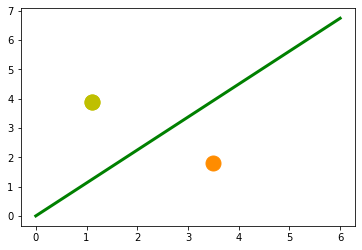

In [6]:
X = np.arange(0, 7) # Definition de l'axe des absisse
fig, ax = plt.subplots() # retourne un axe
ax.plot(3.5, 1.8, "or",
        color="darkorange",
         markersize=15)
ax.plot(1.1, 3.9, "oy",
        markersize=15) # definie le volume ou la grosseur
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9,"oy", markersize=15)
# calcul du gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3) # indique que la largeur de la ligne est a 3
plt.show()

In [7]:
lemon = (1.1, 3.9)  # definie les objets comme des points
orange = (3.5, 1.8)
m = 4.5 / 4
# verifi si les oranges sont bien en dessous de la droite ;on doit donc obtenir une valeur positive
print(orange[0] * m - orange[1])
# verifi si les oranges sont bien en dessous de la droite  ;une valeur positive est atendu
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


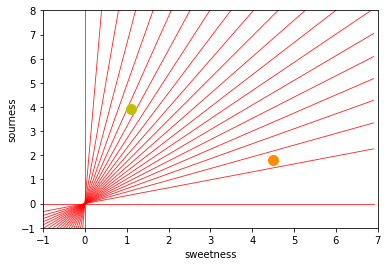

In [8]:
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """
        returns tuple (d, pos)	
        Code Learn Python

        d is the distanceIf pos == -1 point is below the line,
        0 on the line and +1 if aIf pos == -1 point is below the line,
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
           pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1	
        else:
            pos = 1
            return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
        return distance
orange = (4.5, 1.8)	
lemon = (1.1, 3.9)	
fruits_coords = [orange, lemon]
fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness") 
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)
step = 0.05

for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
         results.append(dist4line1)
    if (results[0]!= results[1]):
       ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
       ax.plot(x, y, "o",
       color="darkorange",	
      markersize=size)
    else:
        ax.plot(x, y, "oy",
        markersize=size)


plt.show()

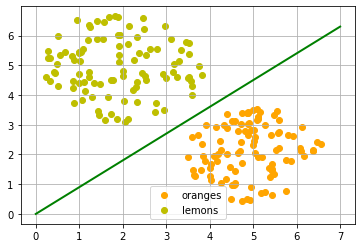

In [9]:
def points_within_circle(radius,
                         center=(0, 0),
                          number_of_points=100):
   center_x, center_y = center
   r = radius * np.sqrt(np.random.random((number_of_points,)))
   theta = np.random.random((number_of_points,)) * 2 * np.pi
   x = center_x + r * np.cos(theta)
   y = center_y + r * np.sin(theta)
   return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)
ax.scatter(oranges_x,
           oranges_y,
            c="orange",
             label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()

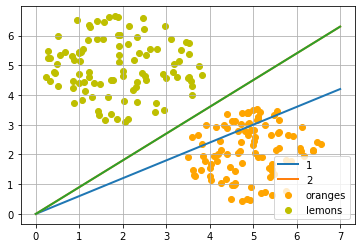

0.8999999999999999


In [10]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
oranges_y,
c="orange",
label="oranges")
ax.scatter(lemons_x,lemons_y,
c="y",
label="lemons")
fruits = list(zip(oranges_x,
oranges_y,
repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,
lemons_y,
repeat(1, len(oranges_x))))
shuffle(fruits)
def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below
            # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X,
            linewidth=2, label=str(counter))
        elif label == 1 and res > 0:
            # point is below line but should be above
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,
            linewidth=2, label=str(counter))
    return slope
slope = adjust()
ax.plot(X,
slope * X,
linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

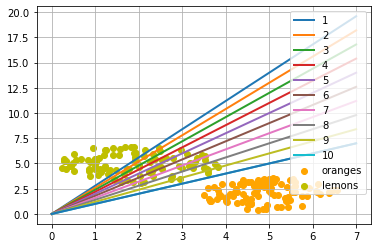

0.9999999999999996


In [11]:

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X,slope * X,linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

In [12]:
class Perceptron:
      def __init__(self, weights):
         """
         'weights' can be a numpy array, list or a tuple with the
         actual values of the weights. The number of input values
         is indirectly defined by the length of 'weights'
         """
         self.weights = np.array(weights)
      def __call__(self, in_data):
         weighted_input = self.weights * in_data
         weighted_sum = weighted_input.sum()
         return weighted_sum
p = Perceptron(weights=[-0.45, 0.5])
for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")




evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
       evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
      evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
print(evaluation)    

-0.34956908229031414, -1.3405763175647536, -0.26627583976420377, -0.4264646861268495, -0.600710654058966, -1.268174550247758, -0.4696978470395572, -1.6447976045062178, -1.092071371827621, -0.44685636984705246, 0.8978443312105038, 1.8390571851004454, 1.0828734517693608, 1.5981552916645558, 1.9880145069144228, 1.628410880914186, 0.9693225637086758, 2.476741557160773, 2.5860839380413845, 2.617946184105994, Counter({'corrects': 200})


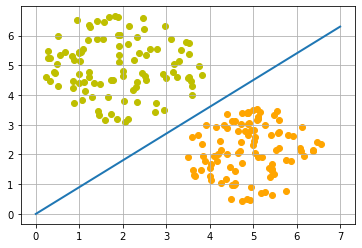

0.9


In [13]:
slope = 0.1
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
slope = 0.45 / 0.5
ax.plot(X, slope * X,
        linewidth=2)
ax.grid()
plt.show()
print(slope)

In [14]:
oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))
# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
                     [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)
data, labels = zip(*labelled_data)
res = train_test_split(data, labels,
                   train_size=0.8,
                   test_size=0.2,
                   random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])

[(2.990484858246472, 4.569614476436173), (3.743259381149327, 4.974963733835966), (5.585439301806278, 2.2095787426617384), (4.260186593292601, 2.166420861255388), (5.585298448930908, 3.1497325992394405), (0.49380928189911377, 5.050647275139755), (4.9403661645254795, 0.8915806795170653), (4.8792060301406135, 3.3959612556233276), (5.1022875150593885, 1.9146643715530178), (4.692524139078736, 2.106088942644904)] [1, 1, 0, 0, 0, 1, 0, 0, 0, 0]


In [15]:
from collections import Counter
class Perceptron:
      def __init__(self,
                   weights,
                   learning_rate=0.1):
         """
         'weights' can be a numpy array, list or a tuple with the
         actual values of the weights. The number of input value
         is indirectly defined by the length of 'weights'
                """
         self.weights = np.array(weights)
         self.learning_rate = learning_rate
      @staticmethod
      def unit_step_function(x):
          if x < 0:
              return 0
          else:
               return 1
      def __call__(self, in_data):
          weighted_input = self.weights * in_data
          weighted_sum = weighted_input.sum()
#print(in_data, weighted_input, weighted_sum)
          return Perceptron.unit_step_function(weighted_sum)
      def adjust(self,
          target_result,
          calculated_result,
          in_data):
        
          if type(in_data) != np.ndarray:
             in_data = np.array(in_data) #
          error = target_result - calculated_result
          if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_dat a, correction, self.weights)
      def evaluate(self, data, labels):
           evaluation = Counter()
           for index in range(len(data)):
               label = int(round(p(data[index]),0))
               if label == labels[index]:
                  evaluation["correct"] += 1
               else:
                   evaluation["wrong"] += 1
           return evaluation
p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
for index in range(len(train_data)):
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.73023635  1.98803954]


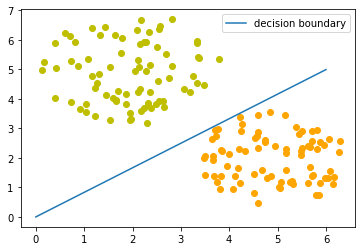

[-2.62019404  3.14895182]


In [ ]:
X = np.arange(0, 7)
fig, ax = plt.subplots()
lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]

lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

2 -2.799263860878901 [-1.57563179 -0.56287362] (5.585439301806278, 2.2095787426617384)
5 1.4989585086315627 [-1.42748901  0.95232056] (0.49380928189911377, 5.050647275139755)
18 0.15442469458355504 [-0.35402428  2.2925367 ] (3.5782157532245877, 4.467387140355236)
21 0.8703229052504285 [-1.73023635  1.98803954] (4.587373564747554, 1.0149905348138666)


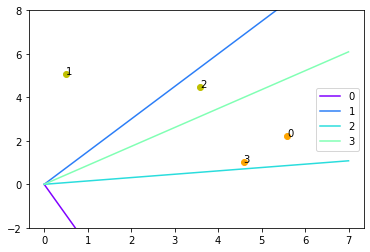

In [16]:
import matplotlib.cm as cm
p = Perceptron(weights=[0.1, 0.1],
learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))
fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
       if (train_labels[index] == 0):
          color = "orange"
       else :
            color = "y"


       ax.scatter(train_data[index][0],
                 train_data[index][1],
                 color=color)
       ax.annotate(str(counter),
           (train_data[index][0], train_data[index][1]))
       m = -p.weights[0] / p.weights[1]
       print(index, m, p.weights, train_data[index])
       ax.plot(X, m * X, label=str(counter), color=colors[counter])
       counter += 1
ax.legend()
plt.show()

[]

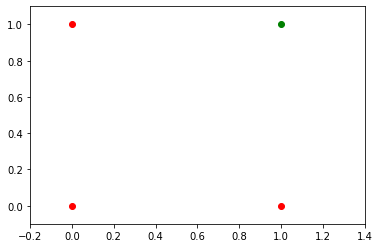

In [17]:
# Avec ce code, nous représentons dans le plan, nos deux classes (0 et 1) à prédire.
# Les éléments de la classe 0 sont de coouleur rouge et ceus de classes 1 sont de couleurs verte
# Le positions des points dans le plan sont donées par les valeurs de leurs entrées
# La première entrée donnant la position en abscisses et la deuxième entrée, la position en ordonnées.
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

[]

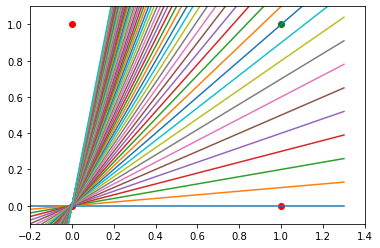

In [18]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

[]

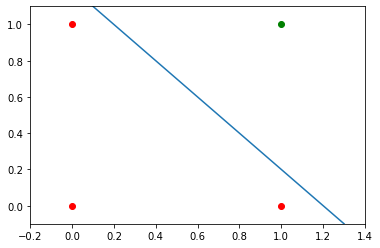

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [19]:

from collections import Counter
class Perceptron:
    def __init__(self,
                 weights,
                 bias=1,
                 learning_rate=0.3):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x <= 0:
            return 0
        else:
            return 1
    
    def _call_(self, in_data):
        in_data = np.concatenate((in_data, [self.bias]))
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self,
              target_result,
              in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate((in_data, [self.bias]))
            correction = error * in_data * self.learning_rate
            self.weights += correction
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample)
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [20]:

def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2, ))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
p = Perceptron(weights = [0.3, 0.3, 0.3], learning_rate = 0.2)
for in_data, label in labelled_samples(30):
    p.adjust(label, in_data)               
    test_data, test_labels = list(zip(*labelled_samples(30)))
    evaluation = p.evaluate(test_data, test_labels)
    print(evaluation)

TypeError: ignored

-1.0 -1.0


[]

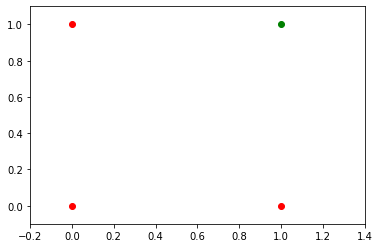

In [21]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()


In [22]:
from sklearn.datasets import make_blobs
n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3],[6.7, 7.9]),
                             random_state=0
                            )


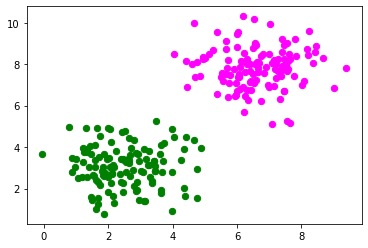

In [23]:
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0],
               samples[labels==n_class][:, 1],
               c=colours[n_class],
               s=40, label=str(n_class)
              )


In [24]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]
p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,sample)
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

#Let us visualize the decision boundary:
    
fig, ax = plt.subplots()

# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],
               learn_data[learn_labels==n_class][:, 1],
               c=colours[n_class],
               s=40, label=str(n_class)
              )
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
               test_data[test_labels==n_class][:, 1],
               c=colours[n_class],
               s=40,
               label=str(n_class)
              )
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

TypeError: ignored

In [25]:

p = Perceptron(weights=[0.3, 0.3, 0.3],
bias=1,
learning_rate=0.2)
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)
    for in_data, label in labelled_samples(30):
        p.adjust(label, in_data)
        test_data, test_labels = list(zip(*labelled_samples(60)))
    evaluation = p.evaluate(test_data, test_labels)
    print(evaluation)

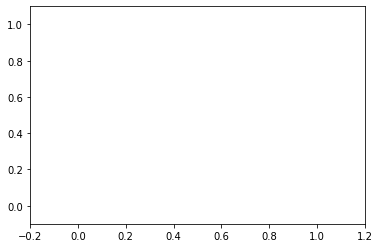

In [26]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [30]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [31]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


In [32]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


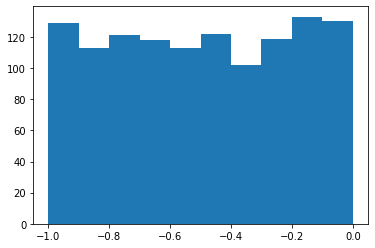

In [33]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

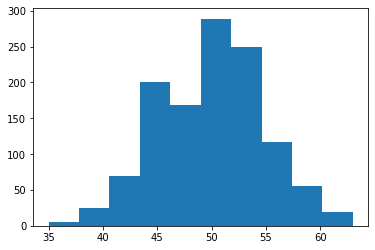

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

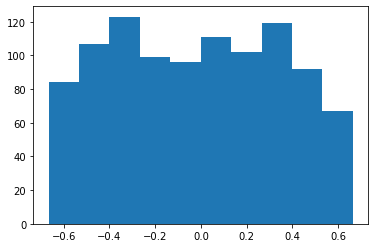

In [ ]:
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

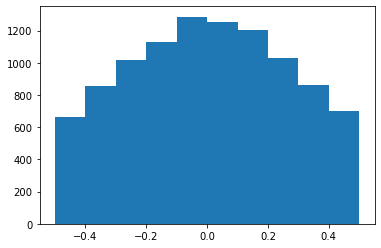

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

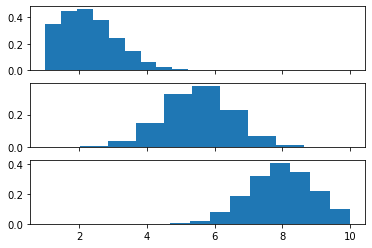

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()


In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 0.15910034, -0.35064375, -0.22521761],
       [ 0.4433114 ,  0.37695006,  0.08202127],
       [-0.05922208,  0.1775472 , -0.18210535],
       [ 0.51219636, -0.09166979,  0.2438907 ]])

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[0.10465929, 0.38603123, 0.23866645, 0.17011955],
       [0.14186778, 0.09707045, 0.25456339, 0.05338642]])

# Dans cette partie nous mettons en oeuvre un réseau de neurones à 3 couches: une couche d'entrée, une coouche de sortie et une couche de sortie
- la couche d'entrée: compposée de 3 neuds
- la couche cachée: composée de 4 neuds
- la couche de sortie: compsée de 3 neuds

In [34]:
# Nous créons une classe "NeuralNetwork" contenant:
# - l'initialisation des hyperparamètres: le nombre de chaque couche et le learning rate
# - 

import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
(low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes))
        
    def train(self):
        pass
    
    def run(self):
        pass

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,
                               no_of_out_nodes = 2,
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1
                              )
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[ 0.51570134 -0.20651682  0.01863599]
 [-0.34324376  0.03929074  0.12653889]
 [-0.33259331  0.30594045  0.23205589]
 [-0.04593751 -0.39755312 -0.17385908]]
[[-0.0142426   0.076972   -0.28196548 -0.3887383 ]
 [ 0.35180428 -0.45895915  0.28505169 -0.32204372]]


# Nous avons à pésent dune fonction d'activation.

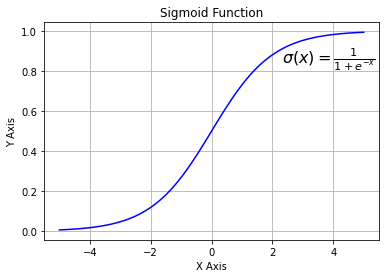

In [ ]:
# Ici nous définissons et visualisons la fonction simoid que nous utilisons comme fonction d'activation

def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


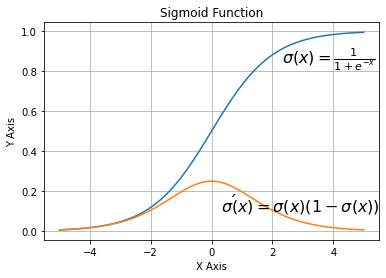

In [ ]:
#Ici nous déinissons et visualisons la fonction simoid et sa dérivée dans le même repère

def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()

In [ ]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [ ]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
            return 0
    else:
        return 1

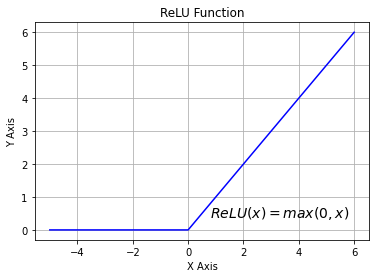

In [ ]:
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

In [35]:
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                         self.no_of_hidden_nodes))
        
    def train(self, input_vector, target_vector):
        pass
    
    def run(self, input_vector):
        """running the network with an input vector 'input_vector'.'input_vector' can be tuple, list or ndarray"""
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

In [37]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=2,
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

In [38]:
simple_network.run([(3, 4)])

array([[0.49987038],
       [0.44232162]])

In [39]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
   return truncnorm ((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [40]:
class NeuralNetwork:
    
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                no_of_hidden_nodes,
                learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
        
    def train(self, input_vector, target_vector):
    # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
# calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
# update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)
        
    def run(self, input_vector):
# make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    
def evaluate(self, data, labels):
    corrects, wrongs = 0, 0
    for i in range(len(data)):
        res = self.run(data[i])
        res_max = res.argmax()
        if res_max == labels[i].argmax():
            corrects += 1
        else:
            wrongs += 1
    return corrects, wrongs

In [41]:
from sklearn.datasets import make_blobs

n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples, centers=blob_centers,random_state=7)

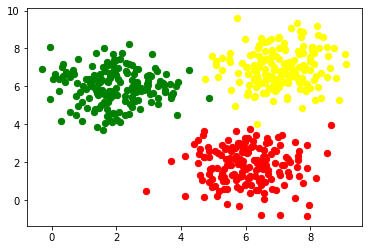

In [42]:
import matplotlib.pyplot as plt

colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0], data[labels==n_class][:, 1], c=colours[n_class], s=40, label=str(n_class))

In [ ]:
labels[:7]

array([2, 2, 1, 0, 2, 0, 1])

In [ ]:
import numpy as np
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float64)
labels[:7]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [43]:
res = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]

array([2, 1, 0, 2, 2, 0, 1, 0, 0, 2])

In [45]:
simple_network = NeuralNetwork(no_of_in_nodes=2, no_of_out_nodes=3, no_of_hidden_nodes=5, learning_rate=0.3)

In [47]:
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])

In [48]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [49]:
class NeuralNetwork:
    
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate, bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
        self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes + bias_node))
        
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        
        if self.bias:
            input_vector = np.concatenate( (input_vector, [[self.bias]]) )
            target_vector = np.array(target_vector).reshape(target_vector.size, 1)
            output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
            output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
            output_error = target_vector - output_vector_network
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)

            hidden_errors = self.weights_hidden_out.T @ output_error

            tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = (tmp @input_vector.T)[:-1,:] 
        else:
            x = tmp @ input_vector.T
            self.weights_in_hidden += self.learning_rate * x
            
    def run(self, input_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        if self.bias:
            input_vector = np.concatenate( (input_vector, [[1]]) )
            input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            input4hidden = np.concatenate( (input4hidden, [[1]]) )
            output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=3, no_of_hidden_nodes=5, learning_rate=0.1,bias=1)

for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
    
simple_network.evaluate(train_data, train_labels)

(0, 400)

In [50]:
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=3, no_of_hidden_nodes=5, learning_rate=0.1,bias=1)

for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
    
simple_network.evaluate(train_data, train_labels)

(113, 287)

In [51]:


simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=3, no_of_hidden_nodes=5, learning_rate=0.1,bias=1)

for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
    
simple_network.evaluate(train_data, train_labels)

(0, 400)

In [ ]:
c = np.loadtxt("strange_flowers.txt", delimiter=" ")

data = c[:, :-1]
n_classes = data.shape[1]
labels = c[:, -1]
data[:5]

OSError: strange_flowers.txt not found.

In [52]:
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float64)
labels[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [53]:
from sklearn import preprocessing

data = preprocessing.scale(data)
data[:5]
data.shape
labels.shape

(500, 3)

In [54]:

res = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=42)

train_data, test_data, train_labels, test_labels = res
train_labels[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [55]:

simple_network = NeuralNetwork(no_of_in_nodes=4, no_of_out_nodes=4, no_of_hidden_nodes=20, learning_rate=0.3)

for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
    
simple_network.evaluate(train_data, train_labels)

UnboundLocalError: ignored

In [56]:
import numpy as np
def softmax(x):

    e_x = np.exp(x)
    return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [57]:
import numpy as np
def softmax(x):

    e_x = np.exp(x)
    return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [58]:
import numpy as np
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

s = softmax(np.array([0, 4, 5]))

si_sj = - s * s.reshape(3, 1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [59]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

class NeuralNetwork:
    
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate, softmax=True):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.softmax = softmax
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes))
        
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ output_vector_hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ output_vector_hidden)
            output_error = target_vector - output_vector_network
        if self.softmax:
            ovn = output_vector_network.reshape(output_vector_network.size,)
            si_sj = - ovn * ovn.reshape(self.no_of_out_nodes, 1)
            s_der = np.diag(ovn) + si_sj
            tmp = s_der @ output_error
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        else:
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
            hidden_errors = self.weights_hidden_out.T @ output_error
            tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
            self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)
            
    def run(self, input_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ input4hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [60]:
n_samples = 300
samples, labels = make_blobs(n_samples=n_samples, centers=([2, 6], [6, 2]), random_state=0)

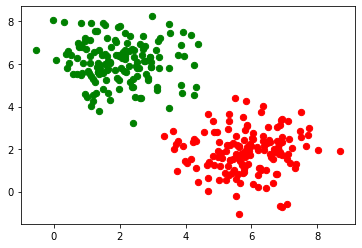

In [61]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))
    size_of_learn_sample = int(n_samples * 0.8)
    learn_data = samples[:size_of_learn_sample]
    test_data = samples[-size_of_learn_sample:]


In [62]:

    
simple_network = NeuralNetwork(no_of_in_nodes=2, no_of_out_nodes=2, no_of_hidden_nodes=5,learning_rate=0.3,softmax=True)

In [63]:
for x in [(1, 4), (2, 6), (3, 3), (6, 2)]:
    y = simple_network.run(x)
    print(x, y, s.sum())

(1, 4) [[0.47662462]
 [0.52337538]] 1.0
(2, 6) [[0.47750277]
 [0.52249723]] 1.0
(3, 3) [[0.46819024]
 [0.53180976]] 1.0
(6, 2) [[0.45552003]
 [0.54447997]] 1.0


In [64]:
labels_one_hot = (np.arange(2) == labels.reshape(labels.size, 1))
labels_one_hot = labels_one_hot.astype(np.float64)

for i in range(size_of_learn_sample):

    simple_network.train(learn_data[i], labels_one_hot[i])
    
from collections import Counter
evaluation = Counter()
simple_network.evaluate(learn_data, labels)

UnboundLocalError: ignored

In [65]:
cm = np.array(
[[5825, 1, 49, 23, 7, 46, 30, 12, 21, 26],
[ 1, 6654, 48, 25, 10, 32, 19, 62, 111, 10],
[ 2, 20, 5561, 69, 13, 10, 2, 45, 18, 2],
[ 6, 26, 99, 5786, 5, 111, 1, 41, 110, 79],
[ 4, 10, 43, 6, 5533, 32, 11, 53, 34, 79],
[ 3, 1, 2, 56, 0, 4954, 23, 0, 12, 5],
[ 31, 4, 42, 22, 45, 103, 5806, 3, 34, 3],
[ 0, 4, 30, 29, 5, 6, 0, 5817, 2, 28],
[ 35, 6, 63, 58, 8, 59, 26, 13, 5394, 24],
[ 16, 16, 21, 57, 216, 68, 0, 219, 115, 5693]])

In [66]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

In [67]:
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns


In [68]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label,cm):6.3f}")

label precision recall
    0     0.983  0.964
    1     0.987  0.954
    2     0.933  0.968
    3     0.944  0.924
    4     0.947  0.953
    5     0.914  0.980
    6     0.981  0.953
    7     0.928  0.982
    8     0.922  0.949
    9     0.957  0.887


In [ ]:
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))

precision total: 0.9496885564052286
recall total: 0.9514531547877969


In [69]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
accuracy(cm)

0.9503833333333334

In [71]:
image_size = 28 
no_of_different_labels = 10 
image_pixels = image_size * image_size
train_data = np.loadtxt( data_path+"mnist_train.csv", delimiter=",")
test_data = np.loadtxt( data_path+"mnist_test.csv", delimiter=",")
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [72]:
test_data[test_data==255]
test_data.shape

(10000, 785)

In [73]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [74]:
import numpy as np
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [75]:
lr = np.arange(no_of_different_labels)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float64)
test_labels_one_hot = (lr==test_labels).astype(np.float64)
# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

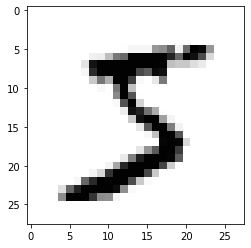

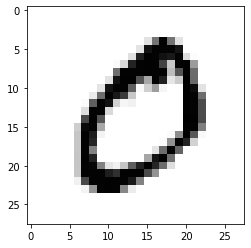

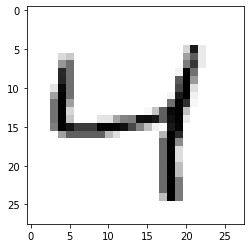

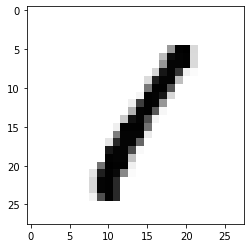

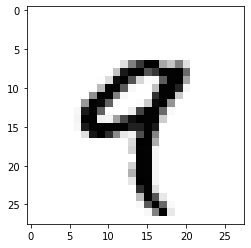

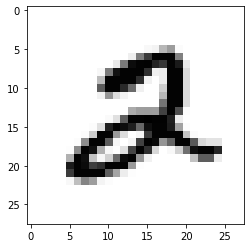

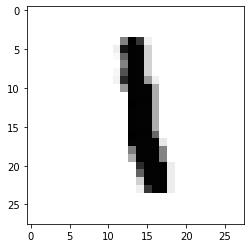

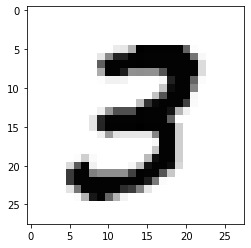

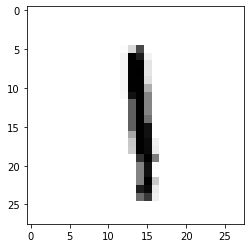

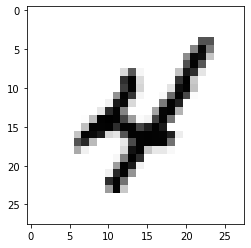

In [76]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [77]:
import pickle 
with open("pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs,
    test_imgs,
    train_labels,
    test_labels,
    train_labels_one_hot,
    test_labels_one_hot)
    pickle.dump(data, fh)

In [78]:
import pickle
with open("pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)
    train_imgs = data[0]
    test_imgs = data[1]
    train_labels = data[2]
    test_labels = data[3]
    train_labels_one_hot = data[4]
    test_labels_one_hot = data[5]
    image_size = 28 # width and length
    no_of_different_labels = 10 # i.e. 0, 1, 2, 3, ..., 9
    image_pixels = image_size * image_size

In [79]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
    activation_function = sigmoid
    from scipy.stats import truncnorm
    def truncated_normal(mean=0, sd=1, low=0, upp=10):
        return truncnorm((low - mean) / sd,
        (upp - mean) / sd,
        loc=mean,
        scale=sd)

In [82]:
class NeuralNetwork:
        def __init__(self,
            no_of_in_nodes,
            no_of_out_nodes,
            no_of_hidden_nodes,
            learning_rate):
            self.no_of_in_nodes = no_of_in_nodes
            self.no_of_out_nodes = no_of_out_nodes
            self.no_of_hidden_nodes = no_of_hidden_nodes
            self.learning_rate = learning_rate
        def create_weight_matrices(self):
                """
                A method to initialize the weight
                matrices of the neural network
                """
                rad = 1 / np.sqrt(self.no_of_in_nodes)
                X = truncated_normal(mean=0,
                sd=1,
                low=-rad,
                upp=rad)
                self.wih = X.rvs((self.no_of_hidden_nodes,
                self.no_of_in_nodes))
                rad = 1 / np.sqrt(self.no_of_hidden_nodes)
                X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
                self.who = X.rvs((self.no_of_out_nodes,
                self.no_of_hidden_nodes))
        def train(self, input_vector, target_vector):
                    """
                    input_vector and target_vector can
                    be tuple, list or ndarray
                    """
                    input_vector = np.array(input_vector, ndmin=2).T
                    target_vector = np.array(target_vector, ndmin=2).T
                    output_vector1 = np.dot(self.wih,input_vector)
                    output_hidden = activation_function(output_vector1)
                    output_vector2 = np.dot(self.who,
                    output_hidden)
                    output_network = activation_function(output_vector2)
                    output_errors = target_vector - output_network
                    # update the weights:
                    tmp = output_errors * output_network \
                    * (1.0 - output_network)
                    tmp = self.learning_rate * np.dot(tmp,
                    output_hidden.T)
                    self.who += tmp
                    # calculate hidden errors:
                    hidden_errors = np.dot(self.who.T,
                    output_errors)
                    # update the weights:
                    tmp = hidden_errors * output_hidden * \
                    (1.0 - output_hidden)
                    self.wih += self.learning_rate \
                    * np.dot(tmp, input_vector.T)
        def run(self, input_vector):
                    # input_vector can be tuple, list or ndarray
                    input_vector = np.array(input_vector, ndmin=2).T
                    output_vector = np.dot(self.wih,
                    input_vector)
                    output_vector = activation_function(output_vector)
                    output_vector = np.dot(self.who,
                    output_vector)
                    output_vector = activation_function(output_vector)
                    return output_vector
        def confusion_matrix(self, data_array, labels):
            cm = np.zeros((10, 10), int)
            for i in range(len(data_array)):
                res = self.run(data_array[i])
                res_max = res.argmax()
                target = labels[i][0]
                cm[res_max, int(target)] += 1
            return cm
        def precision(self, label, confusion_matrix):
                col = confusion_matrix[:, label]
                return confusion_matrix[label, label] / col.sum()
        def recall(self, label, confusion_matrix):
            row = confusion_matrix[label, :]
            return confusion_matrix[label, label] / row.sum()
        def evaluate(self, data, labels):
            corrects, wrongs = 0, 0
            for i in range(len(data)):
                res = self.run(data[i])
                res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
            return corrects, wrongs
ANN = NeuralNetwork(no_of_in_nodes = image_pixels,
no_of_out_nodes = 10,
no_of_hidden_nodes = 100,
learning_rate = 0.1)
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

AttributeError: ignored

In [83]:
epochs = 12
with open("nist_tests.csv", "w") as fh_out:
    for hidden_nodes in [20, 50, 100, 120, 150]:
        for learning_rate in [0.01, 0.05, 0.1, 0.2]:
                for bias in [None, 0.5]:
                    network = NeuralNetwork(no_of_in_nodes=image_pixels,
                    no_of_out_nodes=10,
                    no_of_hidden_nodes=hidden_nodes,
                    learning_rate=learning_rate,bias=bias)
                    weights = network.train(train_imgs,train_labels_one_hot,epochs=epochs,intermediate_results=True)
                    for epoch in range(epochs):
                            print("*", end="")
                            network.wih = weights[epoch][0]
                            network.who = weights[epoch][1]
                            train_corrects, train_wrongs = network.evaluate(train_imgs,train_labels)
                            test_corrects, test_wrongs = network.evaluate(test_imgs,test_labels)
                            outstr=str(hidden_nodes)+""+str(learnin_rate)+""+
                            outstr
                            outstr
                            s + train_wrongs)) + " "
                            outstr
                            + train_wrongs)) + " "
                            outstr
                            + test_wrongs)) + " "
                            outstrest_wrongs))
                            = str(hidden_nodes) + " " + str(learnin

SyntaxError: ignored